# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df = pd.read_csv('../data/checker_submits.csv',parse_dates=['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df = df.drop(columns=['timestamp'])
df


,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [3]:
# encoder = OneHotEncoder(sparse_output=False)
# encoded_X = encoder.fit_transform(df)
# print(encoded_X)
df[['uid']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   uid     1686 non-null   object
dtypes: object(1)
memory usage: 13.3+ KB


In [4]:
onehotencoder = OneHotEncoder(handle_unknown='ignore')
x = pd.DataFrame(onehotencoder.fit_transform(df[['uid']]).toarray())
x

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df = pd.get_dummies(data=df,dtype=float)
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [6]:
df[['numTrials','hour']] = StandardScaler().fit_transform(df[['numTrials','hour']])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [7]:
df.to_csv('../data/dayofweek.csv',index=False)

In [8]:
y = df['dayofweek']
more = np.array([np.argmax(np.bincount(y))] * len(y))
accuracy_score(y, more)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [9]:
X = df.drop('dayofweek',axis=1)
X


,numTrials,hour,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [10]:
model_logreg = LogisticRegression(random_state=21,fit_intercept=False,multi_class='ovr')
model_logreg.fit(X,y)
y_pred = model_logreg.predict(X)
accuracy = accuracy_score(y_pred,y)
accuracy

/home/simmonsc/Desktop/DS_Bootcamp/DS_Bootcamp.Day08.ID_886521-1/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


0.6209964412811388

In [11]:
def plot_features(coefs,features,n = 10):
    fig, axes = plt.subplots(figsize=(15,8))
    coefs = np.abs(coefs).sum(axis = 0)
    indices = coefs.argsort()[-n:]
    axes.barh(np.arange(n),coefs[indices])
    axes.set_yticks(np.arange(n))
    axes.set_yticklabels(features[indices])
    plt.show()

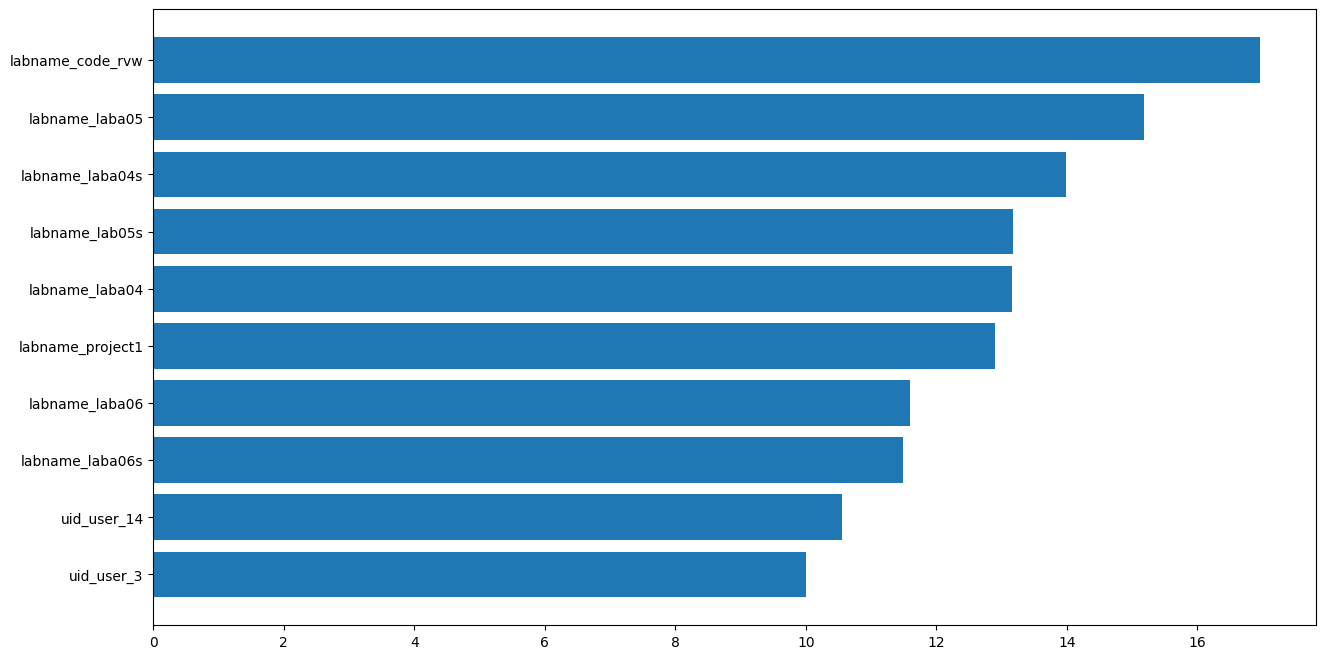

In [12]:
plot_features(model_logreg.coef_,X.columns)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [13]:
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=21,stratify =y)

In [14]:
svc = OneVsRestClassifier(SVC(kernel='linear',probability=True,random_state=21))    
svc.fit(X,y)


OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

In [15]:
y_pred = svc.predict(X)
accuracy =accuracy_score(y_pred,y)
accuracy

0.6126927639383155

In [16]:
kernels = ['rbf', 'poly', 'sigmoid','linear']
for kernel in kernels:
    model = OneVsRestClassifier(SVC(kernel=kernel,probability=True,random_state=21))
    model.fit(X,y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y_pred,y)
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

Kernel: rbf, Accuracy: 0.8641755634638197
Kernel: poly, Accuracy: 0.8653618030842231
Kernel: sigmoid, Accuracy: 0.3499406880189798
Kernel: linear, Accuracy: 0.6126927639383155


In [17]:
def plot_features(svc,features, n = 10):
    fig, axes = plt.subplots(figsize = (15,8))
    coefs = np.array([est.coef_[0] for est in svc.estimators_])  # Get coefficients from estimators
    importances = np.abs(coefs).sum(axis=0)
    # coefs = np.abs(coefs).sum(axis = 0)
    indices = importances.argsort()[-n:]

    
    axes.barh(np.arange(n),importances[indices])
    axes.set_yticks(np.arange(n))
    axes.set_yticklabels(features[indices])
    plt.show()

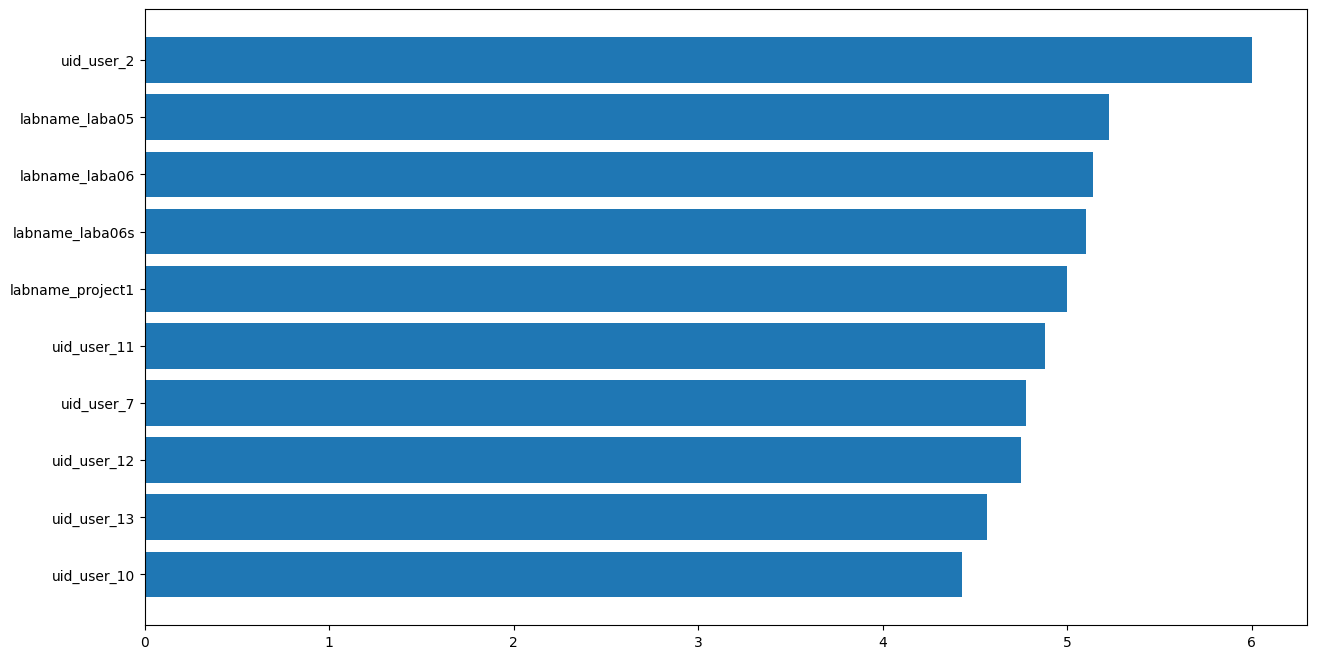

In [18]:
plot_features(svc,X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [19]:
dt = DecisionTreeClassifier(max_depth=4,random_state=21)
dt.fit(X,y)
y_pred = dt.predict(X)
accuracy = accuracy_score(y_pred, y)
accuracy

0.5516014234875445

In [20]:
max_depths = [6,5, 4, 3]
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth,random_state=21)
    dt.fit(X,y)
    y_pred = dt.predict(X)
    accuracy = accuracy_score(y_pred, y)

    print(f"max_depth = {max_depth}, Accuracy: {accuracy}")

max_depth = 6, Accuracy: 0.6637010676156584
max_depth = 5, Accuracy: 0.6109134045077106
max_depth = 4, Accuracy: 0.5516014234875445
max_depth = 3, Accuracy: 0.48991696322657174


In [21]:

def plot_tree_features(model, features, n=10):

    importances = model.feature_importances_
    indices = np.argsort(importances)[-n:]  
    
    plt.figure(figsize=(15, 8))
    plt.barh(range(n), importances[indices])
    plt.yticks(range(n), [features[i] for i in indices])
    plt.xlabel("Feature Importance")
    
    plt.title(f"Top {n} Features from Decision Tree")
    plt.show()

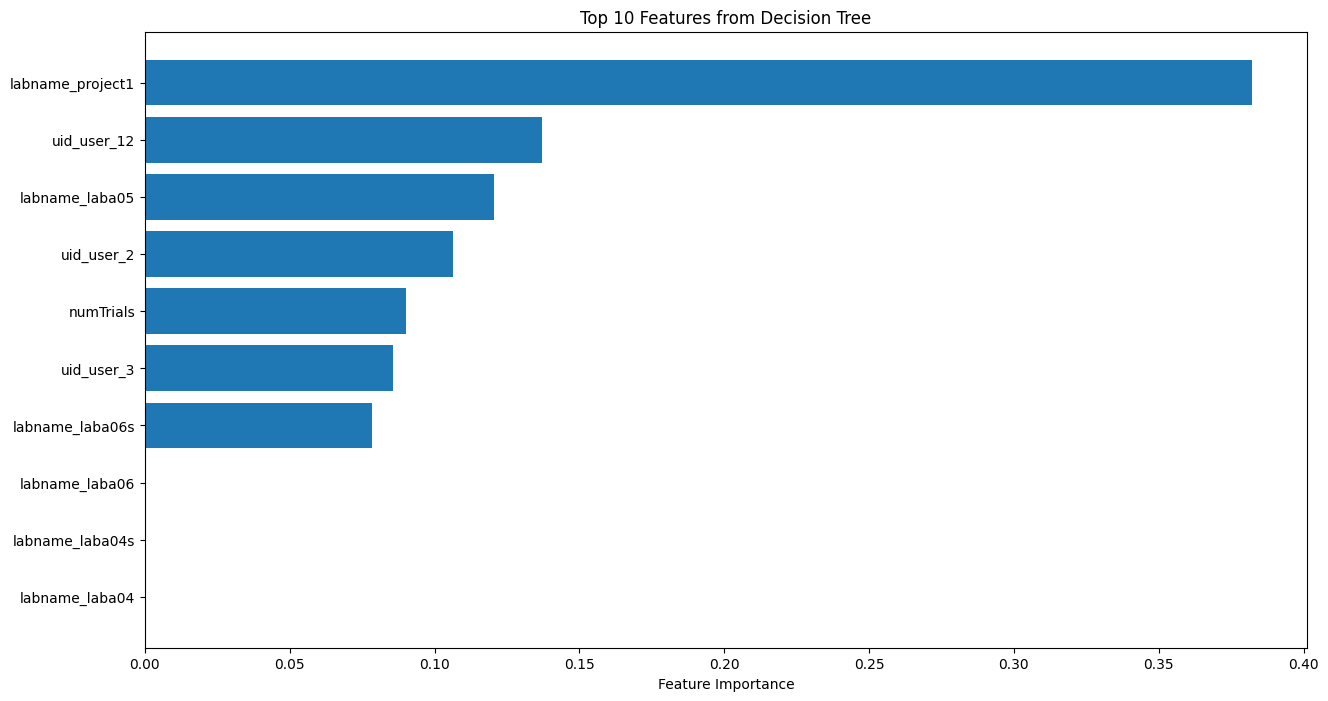

In [22]:
plot_tree_features(dt,X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [23]:
rf = RandomForestClassifier(n_estimators=100,max_depth=25,random_state=21)
rf.fit(X,y)

    
y_pred = rf.predict(X)
accuracy = accuracy_score(y_pred, y)

print(f"n_estimators = 100 and max_depth = 25, Accuracy: {accuracy}")

n_estimators = 100 and max_depth = 25, Accuracy: 1.0


In [24]:
values = {75:20,50:15,30:10}
for n_estimators,depth in values.items():
    rf = RandomForestClassifier(n_estimators=n_estimators,max_depth=depth,random_state=21)
    rf.fit(X,y)
        
    y_pred = rf.predict(X)
    accuracy = accuracy_score(y_pred, y)

    print(f"n_estimators = {n_estimators} and max_depth = {depth}, Accuracy: {accuracy}")

n_estimators = 75 and max_depth = 20, Accuracy: 0.9952550415183867
n_estimators = 50 and max_depth = 15, Accuracy: 0.9786476868327402
n_estimators = 30 and max_depth = 10, Accuracy: 0.8748517200474496


In [25]:
def plot_random_forest_features(model, features, n=10):

    importances = model.feature_importances_
    indices = np.argsort(importances)[-n:]  
    
    plt.figure(figsize=(15, 8))
    plt.barh(range(n), importances[indices])
    plt.yticks(range(n), [features[i] for i in indices])
    plt.xlabel("Feature Importance")
    
    plt.title(f"Top {n} Features from Decision Tree")
    plt.show()

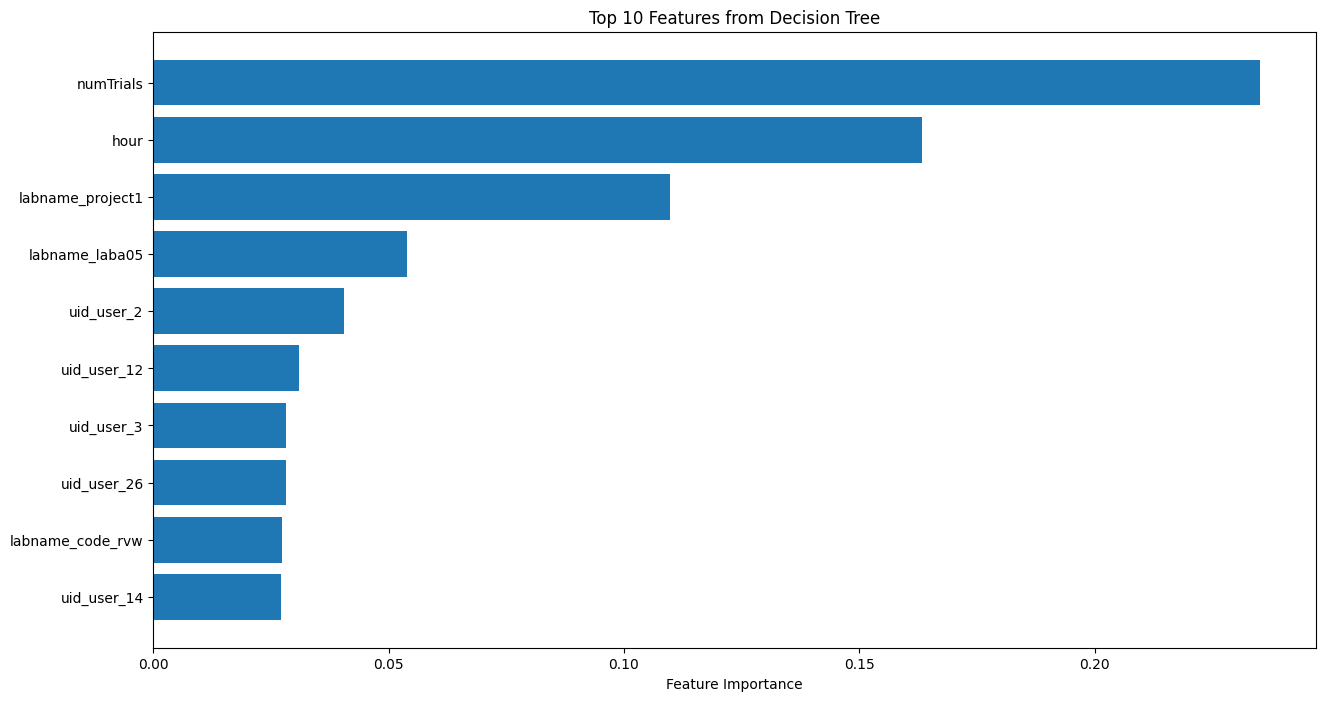

In [26]:
plot_random_forest_features(rf,X.columns)